In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px
print(plotly.__version__)
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

5.24.1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Столбцы таблицы:

* RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Чтобы каждый раз не переделывать в любом графике, связанным со столбцом Exited название labels 1 на ушедший клиент и 0 на лояяльный я создал ещё один столбец - категория. Там будет указываться принадлежность клиента к одной или другой группе

In [3]:
def loyalty_group (group):
    if group == 1: return "Ушедшие клиенты"
    else: return "Лояльные клиенты"
churn_data['loyalty group'] = churn_data['Exited'].apply(loyalty_group)
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,loyalty group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Ушедшие клиенты
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Лояльные клиенты
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Ушедшие клиенты
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Лояльные клиенты
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Лояльные клиенты


## Задания

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [4]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

## 9.1
Сначала проверим, есть ли в dataframe другие значения, кроме 0 и 1

In [5]:
loyalty_data = churn_data['Exited'].value_counts()
loyalty_data
#Таких значений нет, поэтому перейти к ответу на сам вопрос

Exited
0    7963
1    2037
Name: count, dtype: int64

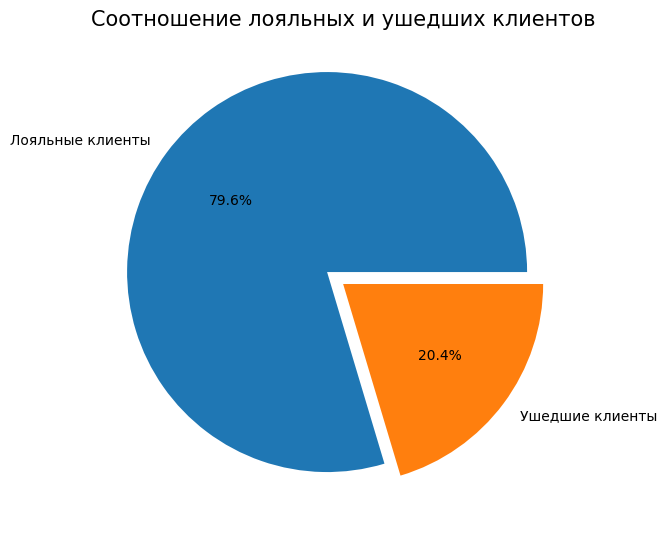

In [6]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyalty_data,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    explode = [0.1, 0]
);
axes.set_title('Соотношение лояльных и ушедших клиентов', fontsize=15);

Как видно из графика выше - практически 4 из 5 клиентов банка это лояльные клиенты, что кажется неплохим соотношением, говорящим о том, что большинство клиентов по той или иной причине выбирает работать с банком. 

## 9.2

In [7]:
#создаём датасет с пользователями, у которых на счету больше 2500 долл.
above_2500_clients = churn_data[churn_data['Balance'] > 2500]


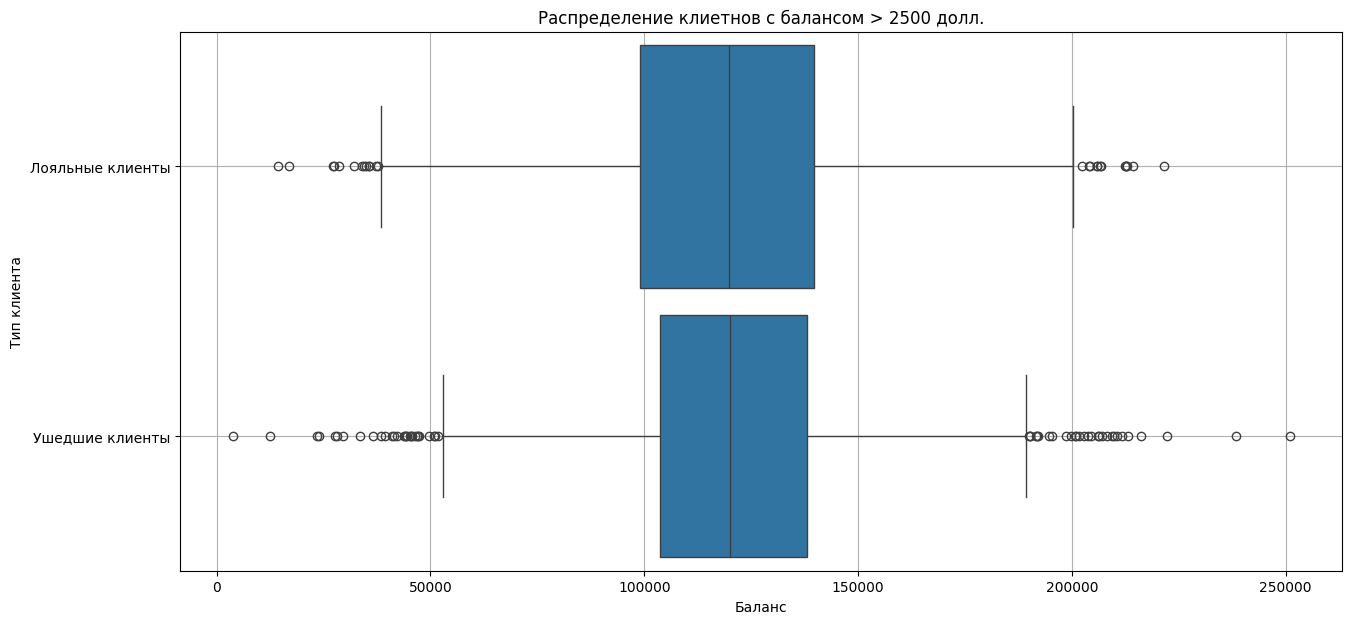

In [8]:
fig = plt.figure(figsize=(15, 7))
boxplot = sns.boxplot(
    data=above_2500_clients,
    y='loyalty group',
    x='Balance',
    orient='h',
    width=0.9
);
boxplot.set_title('Распределение клиетнов с балансом > 2500 долл.');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Тип клиента');
boxplot.grid()

Как видно из графика выше - если брать выборку клиентов с балансом больше 2500 долл., то средний баланс практически идентичен. При этом, у лояльных клиентов больший разброс по квартилям больше, чем у ушедших. Это нам говорит о схожем финансовом положении у этих групп клиентов.

## 9.3

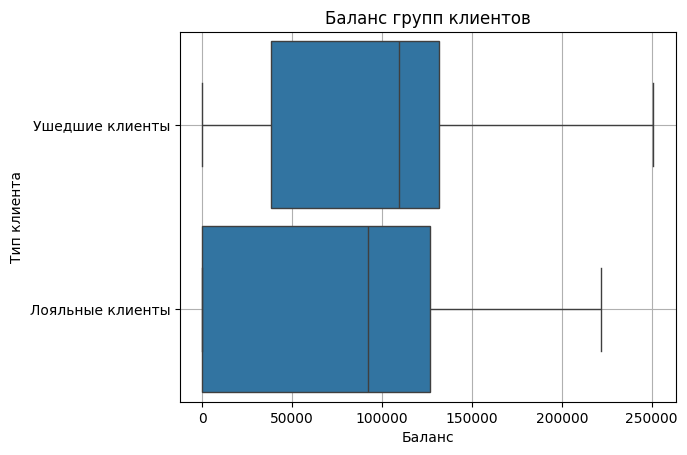

In [9]:
boxplot = sns.boxplot(
    data=churn_data,
    y='loyalty group',
    x='Balance',
    orient='h',
    width=0.9
);
boxplot.set_title('Баланс групп клиентов');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Тип клиента');
boxplot.grid()

Если убрать фильтр на размер баланса из предыдущего задания, то становится видно, что средний ушедший клиент состоятельнее среднего лояльного клиента: медианный баланс лояльного клиента составляет приблизительно 90000 долл., когда у среднего ушедшего клиента баланс около 110000 долл. Об этом же нам говорят размеры 1, 3 и 4 квартилей - каждая из них выше у ушедших клиентов.

## 9.4

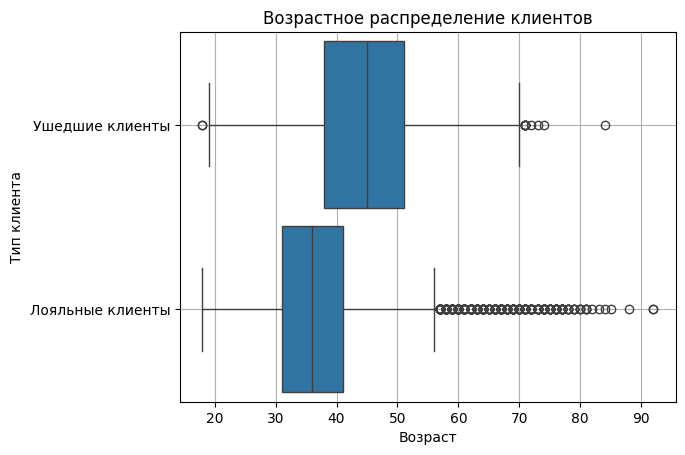

In [10]:
boxplot = sns.boxplot(
    data=churn_data,
    y='loyalty group',
    x='Age',
    orient='h',
    width=0.9
);
boxplot.set_title('Возрастное распределение клиентов');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Тип клиента');
boxplot.grid()

Для этого задание тип графика boxplot снова подходит лучше всего. Как видно, ушедшие клиенты как правило старше лояльных - их 1, 2, 3, 4 квартили и медиана выше таких же показателей у лояльных клиентов. При этом также видно, что у лояльных клиентов также есть большое количество выбросов в более возрастной категории (старше приблизительно 56 лет). При этом, это всё таки исключения, не правила.
Каких - либо аномалий (клиентов с возрастом младше 18 лет, старше 100 лет или с негативным возрастом) не наблюдается
Выходит, что банку стоит подумать о том, как убедить клиентов старше продолжать пользоваться банком, чтобы уменьшить их отток. 

## 9.5

Text(0, 0.5, 'Кредитный рейтинг')

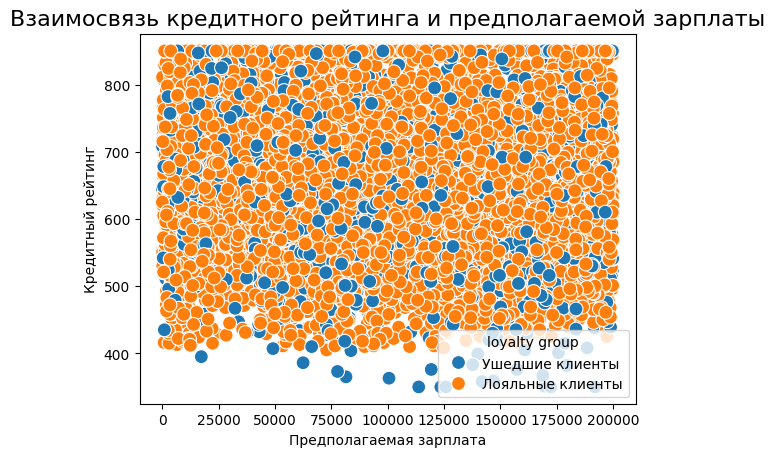

In [11]:
scatterplot = sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='loyalty group',
    s=100,
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Предполагаемая зарплата')
scatterplot.set_ylabel('Кредитный рейтинг')

Судя по графику выше - такой корреляции между двуями переменными нет ни у ушедших, ни у лояльных клиентов


## 9.6

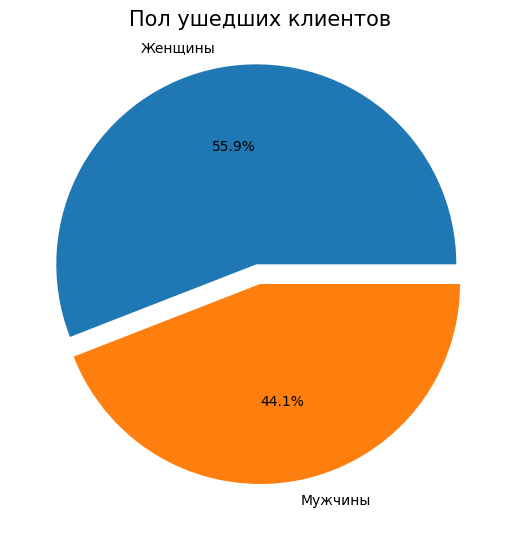

In [12]:
churned_clients = churn_data[churn_data['Exited'] == 1]['Gender'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churned_clients,
    labels=['Женщины', 'Мужчины'],
    autopct='%.1f%%',
    explode = [0.1, 0]
);
axes.set_title('Пол ушедших клиентов', fontsize=15);

Исходя из графика выше - женщины прекращают пользоваться банком чаще, чем мужчины, хоть разница и не так велика

## 9.7
https://stepik.org/lesson/360204/step/5
Я не совсем понял, как именно нужно строить многоуровневую диаграмму, имея всего лишь 2 переменных для работы - ['Exited'] и ['NumOfProducts']. Каждую из этих переменных можно отложить на оси x или y, а вот откуда брать уровни из описания задания не следует, поэтому я решил сделать разделение по полу

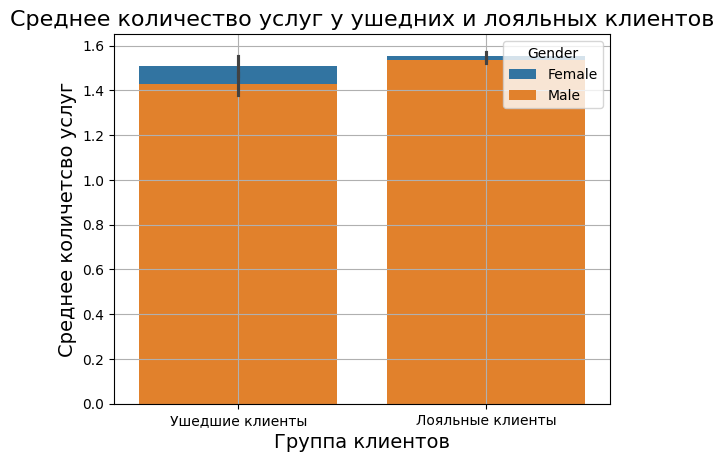

In [13]:
barplot = sns.barplot(
    data=churn_data,
    x='loyalty group',
    y='NumOfProducts',
    hue='Gender',
    dodge=False
)
barplot.set_title('Среднее количество услуг у ушедних и лояльных клиентов', fontsize=16);
barplot.set_ylabel('Среднее количетсво услуг', fontsize=14);
barplot.set_xlabel('Группа клиентов', fontsize=14);
barplot.grid();

Как видно из графика - лояльные клиенты как правило пользуются бОльшим колиеством услуг по сравнению с ушедшими клиентами с меньшим спредом ко квартилям, т.е. не только среднее значение выше у лояльных клиентов, но и "стабильнее", разбос количества услуг у лояльных клиентов меньше. Что ещё интересно - женщины склонные приобретать чуть большее количество услуг по сравнению с мужчинами в обеих категориях клиентов. 

## 9.8
для более правилльного отображения данных я создам новый датасет, где данных в колнке 'IsActiveMember' будет категориальным, т.е. иметь значения "yes" или "no"

In [14]:
def is_active_member (category):
    if category == 1: category ='Активные'
    else: category = 'Неактивные'
    return category

churn_df = churn_data.copy(deep=True) 
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].apply(is_active_member)
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,loyalty group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,Активные,101348.88,1,Ушедшие клиенты
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,Активные,112542.58,0,Лояльные клиенты
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,Неактивные,113931.57,1,Ушедшие клиенты
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,Неактивные,93826.63,0,Лояльные клиенты
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,Активные,79084.10,0,Лояльные клиенты


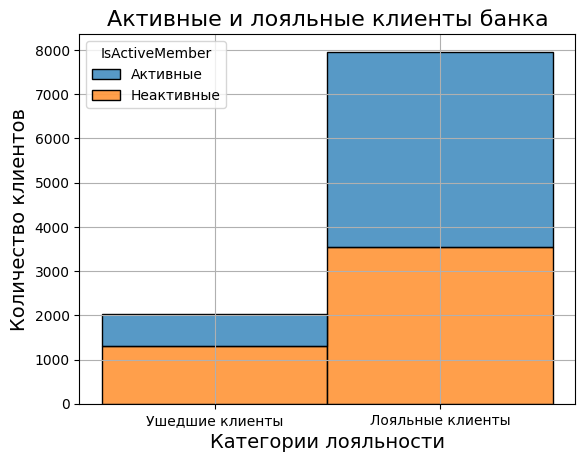

In [15]:
histogram = sns.histplot(
    data=churn_df,
    x='loyalty group',
    hue= 'IsActiveMember',
    multiple= 'stack'
);
histogram.set_title('Активные и лояльные клиенты банка', fontsize=16);
histogram.set_ylabel('Количество клиентов', fontsize=14);
histogram.set_xlabel('Категории лояльности', fontsize=14);
histogram.grid();

Как видно из графика выше - среди ушедших клиентов примерно 75% неактивных, что нормально. При этом остальные клиенты - ушедшие, но лояльные. У такого парадокса может быть много объяснений, но самым очевидным кажется либо выброс, либо же клиенты, которые выплачивают протяжённый во времени кредит / ипотеку, но не пользуются другими продуктами банка.
Что касается лояльных клиентов, то больше половины из них активны, но остальные неактивные. Вполне вероятно, что они могут скоро перейти из категории лояльных и неактивных в категорию ушедших неактивных. На месте руководства банка я бы обратил внимание именно на эту категорию. Имеет смысл постараться их удержать, чтобы они не перешли в категорию ушедших.

## 9.9


In [16]:
churned_clients_data = churn_data[churn_data['Exited'] == 1].groupby('Geography')['Exited'].count()
churned_clients_data

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

In [17]:
# Высчитываем относительный отток клиентов по странам
churn_exit_countries = churn_data.groupby(['Geography'], as_index=False)[['Exited']].mean()
# Строим график
fig = px.choropleth(
    data_frame=churn_exit_countries, 
    locations="Geography", 
    locationmode = "country names", 
    color="Exited", 
    range_color=[0, 0.5], # диапазон цвета
    title='Распределение доли ушедших клиентов по странам',
    width=800, 
    height=500, 
    color_continuous_scale='Reds', # палитра цветов
    scope='europe' # фокус карты на Европе
)
# Отображаем график
fig.show()

Как видно из графика выше - наибольшая доля ушедших клиентов из Германии. Как-либо объяснить такое распределение сложно, так как у нас нет какого-либо контекста для нашего data frame, поэтому что-либо предполагать это скорее пытаться угадать. 
Единственное, что можно сказать наверняка - так это то, что среди этих трёх стран Германия имеет наибольшее население, также возможно банк сконцентрирован на ранке Германии 

## 9.10

In [18]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,loyalty group,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Ушедшие клиенты,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Лояльные клиенты,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Ушедшие клиенты,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Лояльные клиенты,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Лояльные клиенты,Excellent


In [19]:
pivot_table = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

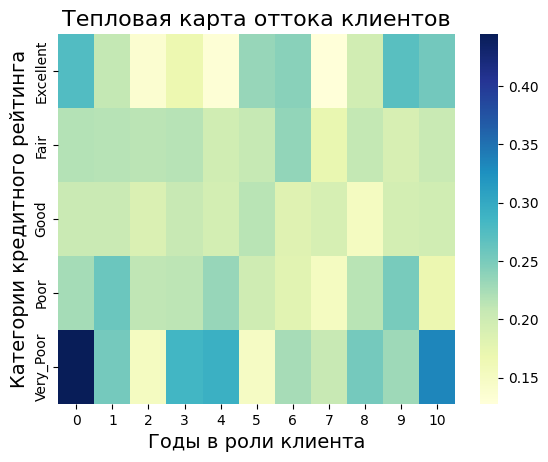

In [20]:
heatmap = sns.heatmap(data=pivot_table, cmap='YlGnBu')
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=16);
heatmap.set_ylabel('Категории кредитного рейтинга', fontsize=14);
heatmap.set_xlabel('Годы в роли клиента', fontsize=14);

Из графика выше видны группы клиентов, которые с наибольшей частотой прекращали пользоваться банком:
1) Клиенты с низжей категорией кредитного рейтинга (Very_Poor)
2) Клиенты, пользуешиеся банком в течение менее, чем одного года

Также можно наблюдать тенденцию, при которой чем лучше у клиента кредитный рейтинг, тем меньше вероятность их ухода из банка. Исключением тут является группа клиентов с наилучшей категорией рейтинга (Excellent) - их вероятность ухода ниже, чем у низшей категории, но выше, чем остальные.